## Analysis of Diabetes Data

<p>The objective of this analysis is to identify the quantitative values of variables that increase the likelihood of an individual to get Diabetes Type II. 
<br/>
The data set we have may need to be masked as we are attempting to merge different data set into one.</p>

NOTE: All data sets do not have any missing values, and therefore do not need to be masked.

## Importing All Packages Required.

Data Management Libaries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as datetime
import time

Statistics Libaries

In [23]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import scipy.stats as stat

<hr>

## Data Analysis of 'Diabetes Health Indicators Dataset'

All data attained from <a href="https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset">here.</a>

### diabetes_health_indicator, diabetes_health_indicator_split

The files <i>diabetes_health_indicator</i> and <i>diabetes_health_indicator_split</i> make up one large data set.

<hr>
<h3>Extracted Data List</h3>
Information attained from each respective documentation.

<pre>

<table>
    <thead>
        <tr>
            <td>Variable </td>
            <td>Values</td>
            <td>Needed?</td>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Diabetes_binary</td>
            <td>0 = no diabetes, 1 = diabetes</td>
            <td>yes</td>
        </tr>
        <tr>
            <td>HighBP</td>
            <td>0 = no high bp, 1 = high bp</td>
            <td>yes</td>
        </tr>
        <tr>
            <td>HighChol</td>
            <td>0 = no high chl, 2 = high chl</td>
            <td>yes</td>
        </tr>
        <tr>
            <td>CholCheck</td>
            <td>0 = did not check chl in < 5 yrs, 1 = checked in 5 yrs</td>
            <td>no</td>
        </tr>
        <tr>
            <td>BMI</td>
            <td> 0 ~ 40 (numerical range)</td>
            <td>yes</td>
        </tr>
        <tr>
            <td>Smoker</td>
            <td>0 = smoked < 100 cigarettes, 1 = smoked > 100 cigarettes</td>
            <td>yes</td>
        </tr>
        <tr>
            <td>Stroke</td>
            <td>0 = smoked < 100 cigarettes, 1 = smoked > 100 cigarettes</td>
            <td>yes</td>
        </tr>
        <tr>
            <td>HeartDiseaseorAttack</td>
            <td>0 = no, 1 = yes</td>
            <td>yes</td>
        </tr>
        <tr>
            <td>PhysActivity</td>
            <td>0 = no physical activity past 30 days, 1 = yes physical activity</td>
            <td>yes</td>
        </tr>
        <tr>
            <td>Fruits</td>
            <td>0 = < 1 a day, 1 = > 1 a day</td>
            <td>yes</td>
        </tr>
        <tr>
            <td>Veggies</td>
            <td>0 = < 1 a day, 1 = > 1 a day</td>
            <td>yes</td>
        </tr>
        <tr>
            <td>HvyAlcoholConsump</td>
            <td>0 = < 14 per week (male) || < 7 per week (female), 1 = !(0)</td>
            <td>yes</td>
        </tr>
        <tr>
            <td>NoDocbcCost</td>
            <td>0 = could go to doctors, 1 = couldn't go to doctors bc fee</td>
            <td>no</td>
        </tr>
        <tr>
            <td>AnyHealthcare</td>
            <td></td>
            <td>no</td>
        </tr>
        <tr>
            <td>GenHlth</td>
            <td></td>
            <td>no</td>
        </tr>
        <tr>
            <td>MentHlth</td>
            <td>0 ~ 30 (days mental health was not good in past 30 days)</td>
            <td>yes</td>
        </tr>
        <tr>
            <td>PhysHlth</td>
            <td>0 ~ 30 (days physical health was not good in past 30 days)</td>
            <td>yes</td>
        </tr>
        <tr>
            <td>DiffWalk</td>
            <td>0 = no difficulty walking or climbing stairs, 1 = !(0) </td>
            <td>yes</td>
        </tr>
        <tr>
            <td>Sex</td>
            <td>0 = male, 1 = female</td>
            <td>yes</td>
        </tr>
        <tr>
            <td>Age</td>
            <td></td>
            <td>yes</td>
        </tr>
        <tr>
            <td>Education</td>
            <td>SCALE NOT DOCUMENTED</td>
            <td>no</td>
        </tr>
        <tr>
            <td>Income</td>
            <td>SCALE NOT DOCUMENTED</td>
            <td>no</td>
        </tr>
    </tbody>
</table>

</pre>



In [24]:
# Initialize the two data sets of interest.
health_indicator_1 = pd.read_csv('./src/data/diabetes_health_indicator.csv', engine='python')
health_indicator_2 = pd.read_csv('./src/data/diabetes_health_indicator_split.csv', engine='python')

# Combine the two data sets.
health_indicator = pd.concat([health_indicator_1, health_indicator_2], sort=True)

# The age field in the data is divided by 5, and so we must un-do this.
health_indicator['Age'] = health_indicator['Age'] * 5 

# Drop unnecessary variables from the DataFrame. 
# These variables do not help us in the scope of our project.
health_indicator = health_indicator.drop('CholCheck', axis=1)
health_indicator = health_indicator.drop('NoDocbcCost', axis=1)
health_indicator = health_indicator.drop('AnyHealthcare', axis=1)
health_indicator = health_indicator.drop('GenHlth', axis=1)
health_indicator = health_indicator.drop('Education', axis=1)
health_indicator = health_indicator.drop('Income', axis=1)

health_indicator_raw = health_indicator

# Set the index of the DataFrame to be the BMI, as this is one of the most significant indicators
# of diabetes.
health_indicator = health_indicator.set_index('BMI')

# Sort the index by ascending value
health_indicator = health_indicator.sort_index()

# Mask away all data of people that are not diabetic.
# (Meaning only grab data of people that ARE diabetic)
diabetes_data = health_indicator.query("Diabetes_binary == 1")

# Grab people that aren't diabetic
non_diabetes_data = health_indicator.query("Diabetes_binary == 0")

# Separate diabetes patients by gender
male_h = diabetes_data.query('Sex == 0')
female_h = diabetes_data.query('Sex == 1')

### DIABETIC PEOPLE's BMI vs Mental Health Rating

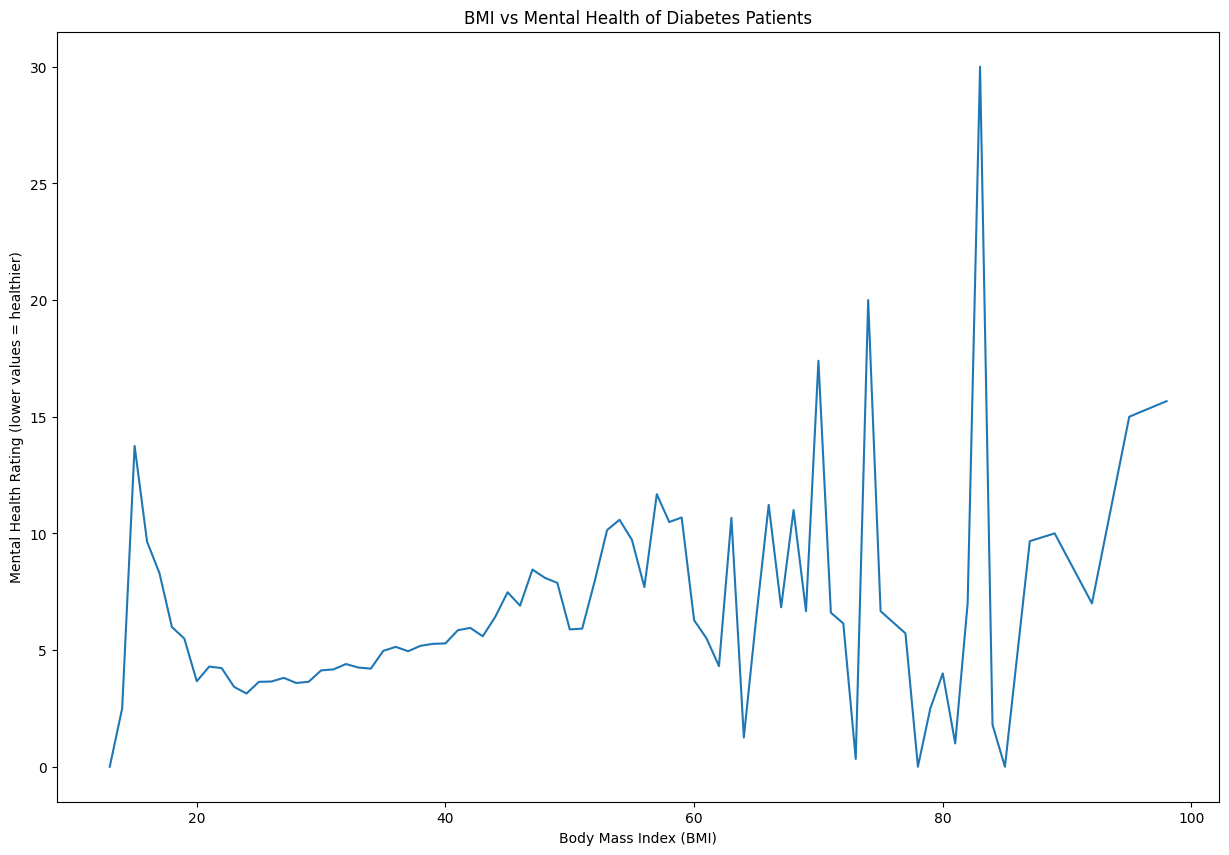

In [25]:
## DIABETIC PEOPLE's BMI vs AGE

mental_health = diabetes_data.groupby(diabetes_data.index)['MentHlth'].mean()


## OLS set up for Stasmodel Regression
x = mental_health.index
y = mental_health.values

# Add a column of ones to the x variables (required for statsmodel regression)
x_ols = sm.add_constant(x)

# Fit linear model to training data (drop missing values)
model = sm.OLS(y, x_ols, missing='drop').fit()

# Attain prediction of the model.
prediction = model.predict(x_ols)

# Store the trend, confidence intervals, and Rsquare
trend = model.params[1]
conf = model.conf_int()[1]
r_sq = model.rsquared

# Perform Pearson's Correlation measure
pearson_test = stat.pearsonr(x, y)

# Store this to use it later.
ment_vs_bmi = [trend, conf, r_sq, pearson_test]

# Plotting the Figures
plt.figure(figsize=(15,10))
plt.plot(mental_health)
plt.xlabel("Body Mass Index (BMI)")
plt.ylabel("Mental Health Rating (lower values = healthier)")
plt.title("BMI vs Mental Health of Diabetes Patients")
plt.show()

## DIABETIC PEOPLE's BMI VS PHYSICAL ACTIVITY LEVELS

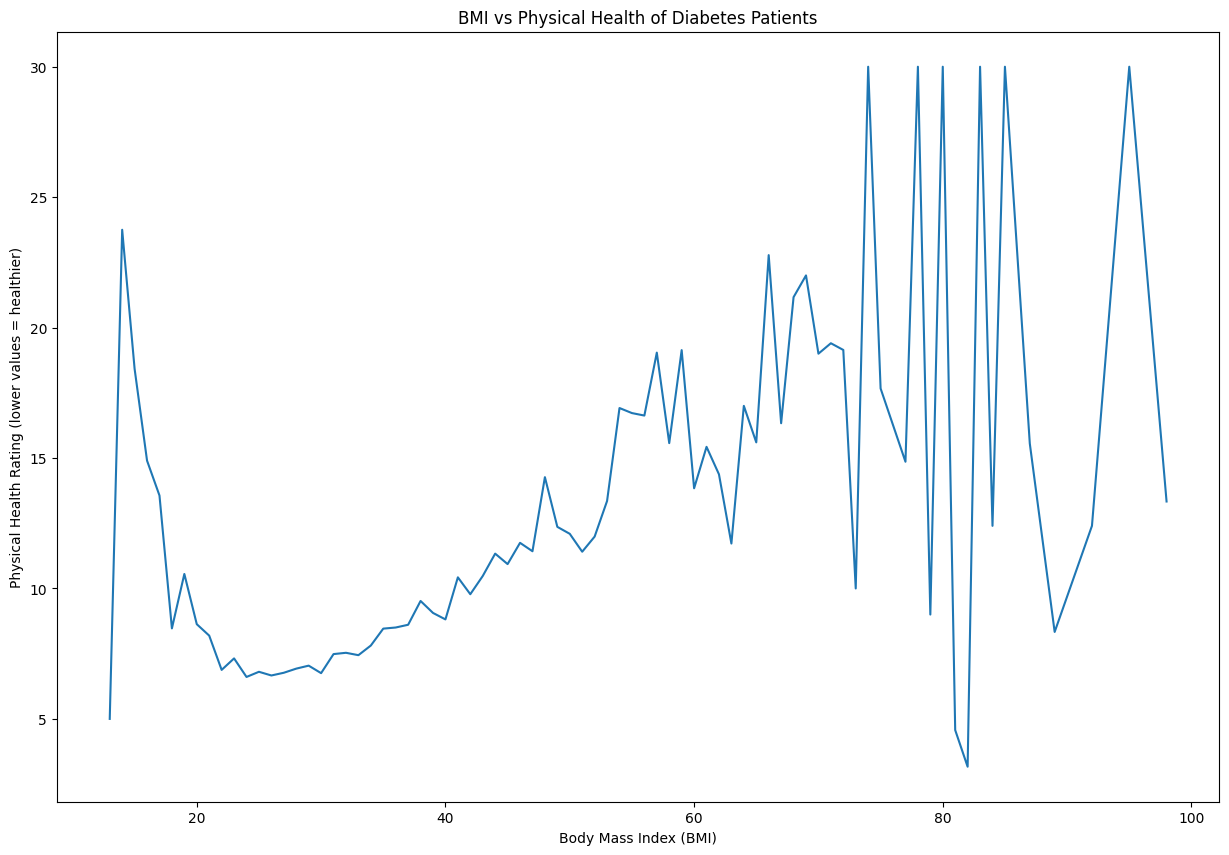

In [26]:
## DIABETIC PEOPLE's BMI vs PHYSICAL ACTIVITY

phys_health = diabetes_data.groupby(diabetes_data.index)['PhysHlth'].mean()

## OLS set up for Stasmodel Regression
x = phys_health.index
y = phys_health.values

# Add a column of ones to the x variables (required for statsmodel regression)
x_ols = sm.add_constant(x)

# Fit linear model to training data (drop missing values)
model = sm.OLS(y, x_ols, missing='drop').fit()

# Attain prediction of the model.
prediction = model.predict(x_ols)

# Store the trend, confidence intervals, and Rsquare
trend = model.params[1]
conf = model.conf_int()[1]
r_sq = model.rsquared

# Perform Pearson's Correlation measure
pearson_test = stat.pearsonr(x, y)

# Store this to use it later on.
phys_vs_bmi = [trend, conf, r_sq, pearson_test]

# Plotting the Figures
plt.figure(figsize=(15,10))
plt.plot(phys_health)
plt.xlabel("Body Mass Index (BMI)")
plt.ylabel("Physical Health Rating (lower values = healthier)")
plt.title("BMI vs Physical Health of Diabetes Patients")
plt.show()

## DIABETIC PEOPLE's AGE vs BMI

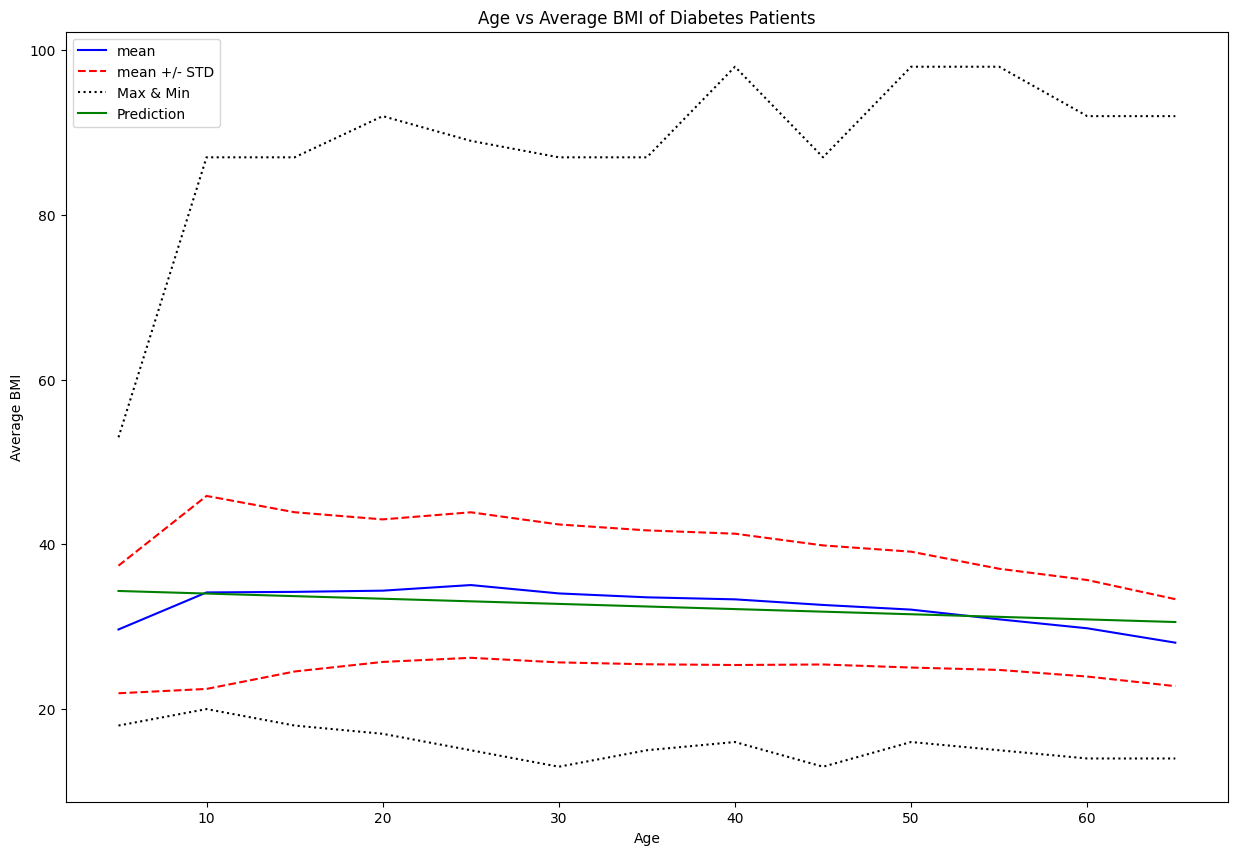

In [27]:
## DIABETIC PEOPLE's BMI vs GENDER

# Retrieve the age group as index and get all diabetic patients
age_h = health_indicator_raw.set_index('Age')
age_h = age_h.sort_index()
age_h = age_h.query("Diabetes_binary == 1")

# Attain Age and BMI together.
bmi_segregated = age_h['BMI']

# Get the mean of all BMI for this age group.
mean = age_h.groupby(age_h.index)['BMI'].mean()

# Get the max value for each age group.
max_v = age_h.groupby(age_h.index)['BMI'].max()

# Get the min value for each age group
min_v = age_h.groupby(age_h.index)['BMI'].min()

# Get the standard deviation
std = age_h.groupby(age_h.index)['BMI'].std()
std_upper = mean + std
std_lower = mean - std

## OLS set up for Stasmodel Regression
x = mean.index
y = mean.values

# Add a column of ones to the x variables (required for statsmodel regression)
x_ols = sm.add_constant(x)

# Fit linear model to training data (drop missing values)
model = sm.OLS(y, x_ols, missing='drop').fit()

# Attain prediction of the model.
prediction = model.predict(x_ols)

# Store the trend, confidence intervals, and Rsquare
trend = model.params[1]
conf = model.conf_int()[1]
r_sq = model.rsquared

# Perform Pearson's Correlation measure
pearson_test = stat.pearsonr(x, y)

# Store this to use it later on.
age_vs_bmi = [trend, conf, r_sq, pearson_test]

# Plotting the Figures
plt.figure(figsize=(15,10))
plt.plot(mean, color='b', label='mean', linestyle='-')
plt.plot(std_upper, color='r', label='mean +/- STD', linestyle='--')
plt.plot(std_lower, color='r', linestyle='--')
plt.plot(max_v, color ='k', label='Max & Min', linestyle=':')
plt.plot(min_v, color ='k', linestyle=':')
plt.plot(mean.index, prediction, color='g', label='Prediction')
plt.xlabel("Age")
plt.ylabel("Average BMI")
plt.title("Age vs Average BMI of Diabetes Patients")
plt.legend()
plt.show()

## DIABETES AS DEPENDENT VARIABLE AGAINST ALL VARIABLES OF INTEREST

In [35]:
# DIABETES AS DEPENDENT VARIABLE AGAINST ALL VARIABLES OF INTEREST

# select the variables of interest
variables = ['Diabetes_binary', 'Age', 'BMI', 'HighChol', 'Smoker',
             'Stroke', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
             'MentHlth', 'PhysHlth']

# create a subset of the dataframe with only the variables of interest
data_subset = health_indicator_raw[variables]

# separate the dependent variable (Diabetes_binary) from the independent variables
y = data_subset['Diabetes_binary']
X = data_subset.drop('Diabetes_binary', axis=1)

# add a constant to the independent variables for the intercept term
X = sm.add_constant(X)

# fit a linear regression model
model = sm.OLS(y, X).fit()

# print the results summary
print(model.summary())

trend = model.params
conf = model.conf_int()[1]
r_sq = model.rsquared

# Store this to use it later on.
diabetes_subset = [trend, conf, r_sq, pearson_test]

                            OLS Regression Results                            
Dep. Variable:        Diabetes_binary   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     6225.
Date:                Wed, 03 May 2023   Prob (F-statistic):               0.00
Time:                        21:44:31   Log-Likelihood:            -1.4482e+05
No. Observations:              324372   AIC:                         2.897e+05
Df Residuals:                  324361   BIC:                         2.898e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.3970      0.00


## diabetes_prediction_dataset

Contains more specific variables such as blood glucose and HbA1c_level.
<br/>
<br/>
<strong>This makes the data a little bit more invalid with our usage, as our users probably don't know their exact blood-glucose levels.</strong>

<hr>
<h3>Extracted Data List</h3>
Information attained from each respective documentation.

<pre>

<table>
    <thead>
        <tr>
            <td>Variable </td>
            <td>Values</td>
            <td>Needed?</td>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>gender</td>
            <td>"Female", "Male"</td>
            <td>yes</td>
        </tr>
        <tr>
            <td>age</td>
            <td></td>
            <td>yes</td>
        </tr>
        <tr>
            <td>hypertension</td>
            <td>0 = no, 1 = yes</td>
            <td>no</td>
        </tr>
        <tr>
            <td>heart_disease</td>
            <td>0 = no, 1 = yes</td>
            <td>yes</td>
        </tr>
        <tr>
            <td>smoking_history</td>
            <td>"No Info", "never", "current", "former"</td>
            <td>yes</td>
        </tr>
        <tr>
            <td>bmi</td>
            <td></td>
            <td>yes</td>
        </tr>
        <tr>
            <td>HbA1c_level</td>
            <td>(Measure of avg blood sugar level over 2~3 months)</td>
            <td>no</td>
        </tr>
        <tr>
            <td>blood_glucose_level</td>
            <td></td>
            <td>yes</td>
        </tr>
        <tr>
            <td>diabetes</td>
            <td>0 = no, 1 = yes</td>
            <td>yes</td>
        </tr>
    </tbody>
</table>

</pre>



## Diabetes VS Variables of Interest

In [39]:
prediction_dataset = pd.read_csv('./src/data/diabetes_prediction_dataset.csv', engine='python')

variables = ['diabetes', 'age', 'hypertension', 
             'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# create a subset of the dataframe with only the variables of interest
data_subset = prediction_dataset[variables]

# separate the dependent variable (diabetes) from the independent variables
y = data_subset['diabetes']
X = data_subset.drop('diabetes', axis=1)

# =====================================================

## USED FOR DEBUGGING
# Checks if there are any missing values in the columns
# print(data_subset.isnull().sum())

# Checks the type of each value stored in the columns
# print(data_subset.dtypes)

# =====================================================

# add a constant to the independent variables for the intercept term
X = sm.add_constant(X)

# fit a linear regression model
model = sm.OLS(y, X).fit()

# print the results summary
print(model.summary())

trend = model.params
conf = model.conf_int()[1]
r_sq = model.rsquared

# Store this to use it later on.
p_diabetes_subset = [trend, conf, r_sq, pearson_test]

                            OLS Regression Results                            
Dep. Variable:               diabetes   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     8887.
Date:                Wed, 03 May 2023   Prob (F-statistic):               0.00
Time:                        21:48:17   Log-Likelihood:                 7172.5
No. Observations:              100000   AIC:                        -1.433e+04
Df Residuals:                   99993   BIC:                        -1.426e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.8659    